# Question 2020-09-02

Is there a way to define a fixed concentration in calculate()? I want to plot GM over T for all possible phases of a system at a given concentration, however I can't seem to find a way to define said c in the function, if there is one.

# Solution

The phase ALMG_BETA does not exist under the specified conditions
The phase ALMG_EPSILON does not exist under the specified conditions


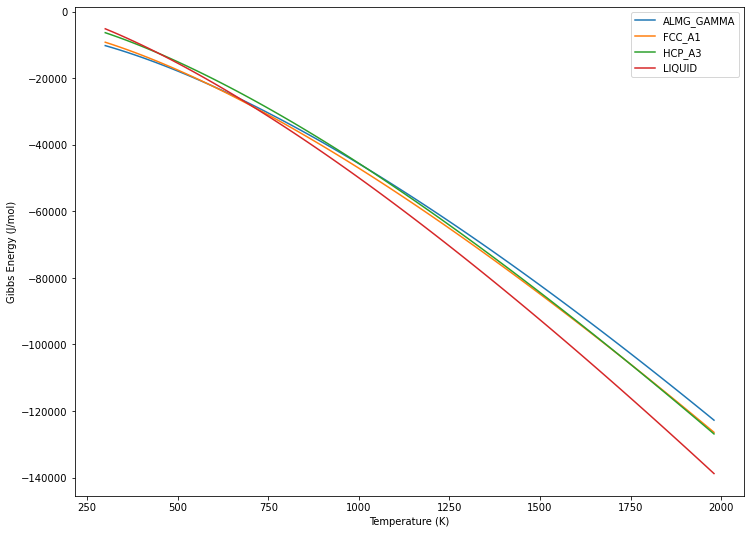

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, equilibrium, variables as v

dbf = Database('Al-Mg_Zhong.tdb')
fig = plt.figure(figsize=(12,9))
ax = fig.gca()

start_temp = 300 # K
end_temp = 2000 # K
step_size = 20 # K
mg_composition = 0.3 # mole fraction

for phase_name in sorted(dbf.phases.keys()):
    try:
        eq = equilibrium(dbf, ['AL', 'MG', 'VA'], phase_name,
                         {v.N: 1, v.P: 1e5, v.T: (start_temp, end_temp, step_size), v.X('MG'): mg_composition})
        ax.plot(eq['T'].values, eq['GM'].values.flatten(), label=phase_name)
    except ValueError:
        print(f'The phase {phase_name} does not exist under the specified conditions')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Gibbs Energy (J/mol)')
ax.legend(loc='best')
fig.show()